In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
!pip install scikeras[tensorflow]
!pip install scikeras[tensorflow-cpu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Foun

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 MB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/sentimentallll.csv')

In [ ]:
analyzer = SentimentIntensityAnalyzer()


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['Text'])
X = tokenizer.texts_to_sequences(data['Text'])
X = pad_sequences(X, maxlen=100)


In [ ]:
def vader_to_label(score):
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
vader_labels = data['Sentiment'].apply(lambda x: 'positive' if x == 'Positive' else ('negative' if x == 'Negative' else 'neutral'))


In [ ]:
y_vader = pd.get_dummies(vader_labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_vader, test_size=0.2, random_state=42)


In [ ]:
def create_lstm_model(units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
    model.add(LSTM(units=units, dropout=dropout_rate, recurrent_dropout=dropout_rate))
    model.add(Dense(units=3, activation='softmax'))
    return model


In [ ]:
lstm_model = create_lstm_model()
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
lstm_model.layers[-1] = tf.keras.layers.Dense(units=y_train.shape[1], activation="softmax")

In [ ]:
lstm_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
y_pred = lstm_model.predict(X_train)
print(f"Shape of y_pred: {y_pred.shape}")

19/19 [==============================] - 1s 38ms/step
Shape of y_pred: (585, 3)


In [ ]:
y_train = tf.one_hot(y_train, depth=3)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.02, 0.03],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'init': ['normal', 'uniform']
}

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=32, activation='relu', input_shape=(100,)))

In [ ]:
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
def create_model(learning_rate, activation):
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='uniform', activation=activation))
    model.add(Dense(8, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [ ]:
param_grid = {
    'batch_size': [10, 32],
    'epochs': [10, 50],
    'learning_rate': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=KerasClassifier(build_fn=create_model), param_distributions=param_grid, n_iter=10, cv=3)

<ipython-input-86-788997d6f5c0>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  random_search = RandomizedSearchCV(estimator=KerasClassifier(build_fn=create_model), param_distributions=param_grid, n_iter=10, cv=3)


In [ ]:
!pip install keras
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
import keras

In [ ]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of model output: {lstm_model.output_shape}")

Shape of y_train: (585, 3)
Shape of model output: (None, 3)


In [ ]:
lstm_model.summary()

Model: "sequential_396"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 100)          500000    
                                                                 
 lstm_30 (LSTM)              (None, 64)                42240     
                                                                 
 dense_1125 (Dense)          (None, 3)                 195       
                                                                 
Total params: 542,435
Trainable params: 542,435
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = y_train.reshape(-1, 3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(585, 100)
(585, 3)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(147, 100)
(147, 1)


In [ ]:
print(X_train.dtype)
print(y_train.dtype)

int32
float32


In [ ]:
print(X_test.dtype)
print(y_test.dtype)

int32
float32


In [ ]:
y_test = y_test.astype('float32')
print(X_test.dtype)
print(y_test.dtype)

int32
float32


In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(100,), activation='relu'))  # Adjust input_shape to match the shape of X_train
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))

In [ ]:
print(X_train.shape)

(585, 100)


In [ ]:
print(y_train.shape)

(585, 3)


In [ ]:
X_train_adjusted = X_train[:, :13]  # Select the first 13 columns of each sample

# Define the model
model = Sequential()
model.add(Dense(12, input_shape=(13,), activation='relu'))  # Adjust input_shape to (13,)
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Adjust the output layer units to match the number of classes in y_train

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_490"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1405 (Dense)          (None, 12)                168       
                                                                 
 dense_1406 (Dense)          (None, 8)                 104       
                                                                 
 dense_1407 (Dense)          (None, 3)                 27        
                                                                 
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(12, input_shape=(100,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_491"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1408 (Dense)          (None, 12)                1212      
                                                                 
 dense_1409 (Dense)          (None, 8)                 104       
                                                                 
 dense_1410 (Dense)          (None, 3)                 27        
                                                                 
Total params: 1,343
Trainable params: 1,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train.shape)

(585, 100)


In [ ]:
print(y_train.shape)

(585, 3)


In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(100,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)

19/19 [==============================] - 0s 3ms/step - loss: 10.1253 - accuracy: 0.7932
Training Loss: 10.125317573547363
Training Accuracy: 0.7931624054908752


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 1s 7ms/step - loss: 5.2349 - accuracy: 0.8932 - val_loss: 0.9586 - val_accuracy: 0.9744
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6386 - accuracy: 0.9615 - val_loss: 2.3790e-04 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1781 - accuracy: 0.9872 - val_loss: 4.8577e-06 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 0.9936 - val_loss: 3.3810e-06 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 0.9979 - val_loss: 3.1101e-06 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 9.6349e-04 - accuracy: 1.0000 - val_loss: 3.0357e-06 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 5.4875e-04 - accuracy: 1.0000 - val_loss: 3.0113e-06 - val_accur

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Loss:", loss)
print("Training Accuracy:", accuracy)


19/19 [==============================] - 0s 4ms/step - loss: 1.5907e-04 - accuracy: 1.0000
Training Loss: 0.00015907046326901764
Training Accuracy: 1.0


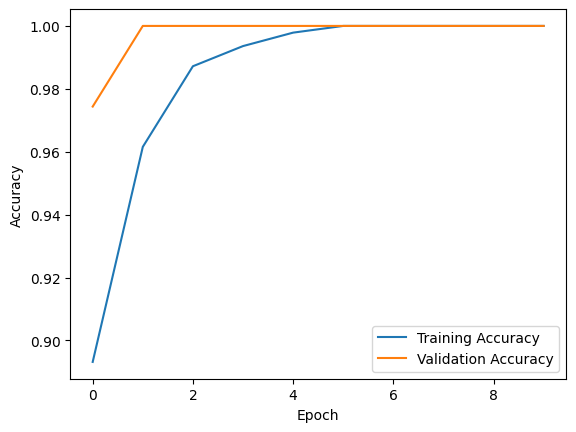

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
new_texts = [
    "I absolutely loved the movie! The acting was fantastic and the plot kept me engaged throughout.",
    "The customer service at this restaurant was terrible. The food took forever to arrive, and when it did, it was cold.",
    "I'm feeling very happy today. The weather is beautiful and I just got some great news!",
    "I can't believe how rude the cashier was at the grocery store. I won't be going back there again.",
    "The new album from my favorite band is amazing. I've been listening to it on repeat all day.",
    "I'm so disappointed with the quality of this product. It broke after just one use.",
    "I had a wonderful experience at the spa yesterday. The massage was so relaxing and the staff were very friendly.",
    "The traffic this morning was unbearable. I was stuck in gridlock for over an hour.",
    "I'm really excited about my upcoming vacation. I can't wait to relax on the beach and explore a new city.",
    "The concert last night was incredible. The music was fantastic and the atmosphere was electric."
]

In [ ]:
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_sequences_padded = pad_sequences(new_sequences, maxlen=100)





predicted_sentiments = [np.argmax(probabilities) for probabilities in predicted_probabilities]


sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiments = [sentiment_mapping[label] for label in predicted_sentiments]


for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print()

Text: I absolutely loved the movie! The acting was fantastic and the plot kept me engaged throughout.
Predicted Sentiment: neutral

Text: The customer service at this restaurant was terrible. The food took forever to arrive, and when it did, it was cold.
Predicted Sentiment: neutral

Text: I'm feeling very happy today. The weather is beautiful and I just got some great news!
Predicted Sentiment: neutral

Text: I can't believe how rude the cashier was at the grocery store. I won't be going back there again.
Predicted Sentiment: neutral

Text: The new album from my favorite band is amazing. I've been listening to it on repeat all day.
Predicted Sentiment: neutral

Text: I'm so disappointed with the quality of this product. It broke after just one use.
Predicted Sentiment: neutral

Text: I had a wonderful experience at the spa yesterday. The massage was so relaxing and the staff were very friendly.
Predicted Sentiment: neutral

Text: The traffic this morning was unbearable. I was stuck in

In [ ]:
predicted_probabilities = model.predict(new_sequences_padded)

1/1 [==============================] - 0s 78ms/step
